# Capstone - What Makes the Best Rated Wine?

## 1. Introduction
For fellow wine lovers out there, when browsing in a wine shop and seeing the sign that has a 98 point next to it - aren't you more inclined to buy it compared to the bottle next to it that says 88 point? <br />
In this notebook, I want to explore what makes the highest rated wine and one can use the model to predict the point of a bottle given its region, variety, price and year. <br /> This notebook is intended for anyone who's interested in wine tasting, and how 'experts' in the industry tend to rate wines (any potential bias such as higher priced wine getting higher ratings), and can use the model to predict an unknown bottle.

## 2. Data
Here I will be using the
<a href="https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv">winemag-data-130k-v2.csv</a> dataset from Kaggle. Columns in the dataset:

country: the country that the wine is from<br /> 
description: a long description/commentary of the wine<br />
designation:The vineyard within the winery where the grapes that made the wine are from<br />
points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (mostly >=80)<br /> 
price: The cost for a bottle of the wine<br /> 
province: The province or state that the wine is from<br /> 
region_1: The wine growing area in a province or state (ie Napa)<br /> 
region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank<br /> 
taster_name: name of the taster<br /> 
taster_twitter_handle: twitter handle of taster<br /> 
title: name of the wine<br /> 
variety: The type of grapes used to make the wine (i.e. Pinot Noir)<br /> 
winery: winery the wine is from<br /> 

### 2.1 data cleaning
First we need to prepare the data through data cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df0 = pd.read_csv('winemag-data-130k-v2.csv')
df0.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [119]:
#create a new column of year using the year in the title column
df0['year']=df0['title'].str.extract(r'(\d{4})')
df0.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  year  
0     White Blend              Nicosia  2013  
1  Portuguese Red  Quinta dos Avidagos  2011  
2      Pinot Gris            Rainstorm  2013  
3        Riesling           St. Julian  2013  
4      Pinot Noir         Sweet Cheeks  2012

In [4]:
df0.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
year                      4609
dtype: int64

We can see that the dataset has quite some null values in some columns, let's drop the N/As in the following columns that is relevant for our analysis

In [5]:
df= df0.dropna(subset=['price', 'points','province','region_1','year'])
df.shape

(97715, 15)

In [120]:
#select columns to keep for analysis
df['year'] = df['year'].astype(int)
df = df[['country','description','points','price',
       'province','region_1','title','variety','winery','year']]
df.head()

country                                        description  points  price  \
2      US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3      US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4      US  Much like the regular bottling from 2012, this...      87   65.0   
5   Spain  Blackberry and raspberry aromas show a typical...      87   15.0   
6   Italy  Here's a bright, informal red that opens with ...      87   16.0   

            province             region_1  \
2             Oregon    Willamette Valley   
3           Michigan  Lake Michigan Shore   
4             Oregon    Willamette Valley   
5     Northern Spain              Navarra   
6  Sicily & Sardinia             Vittoria   

                                               title             variety  \
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
6   Terre di Giurfo 2013 Belsito Frappato (Vittoria)            Frappato   

            winery  year  
2        Rainstorm  2013  
3       St. Julian  2013  
4     Sweet Cheeks  2012  
5           Tandem  2011  
6  Terre di Giurfo  2013

In [121]:
#double check no N/As
df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
year           0
dtype: int64

### 2.2 assumptions
I want to first make some assumptions based on "common sense" or our impression of wines:
- higher priced bottles get higher points
- older bottles get higher points 
- French and Italian wines have highest points

### 2.3 data exploration
Now we're ready to explor the data a little bit more using data visualization:

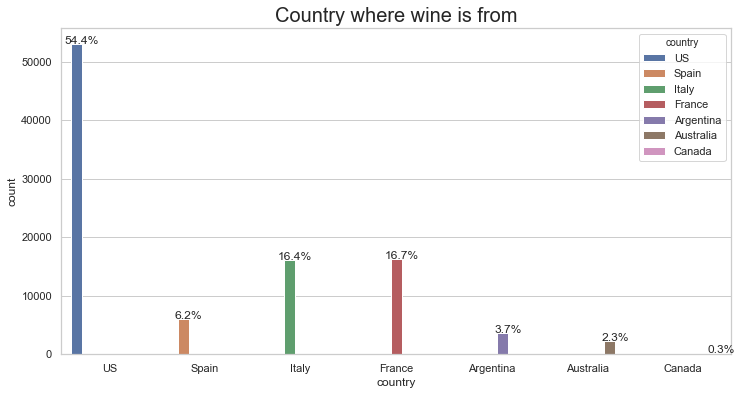

In [122]:
#first to see how many records are from which country in this dataset

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="country", hue="country", data=df)
plt.title('Country where wine is from', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Looks like most of the data come from US, French, and Italian wines - we should keep that in mind when we think about bias in the data.

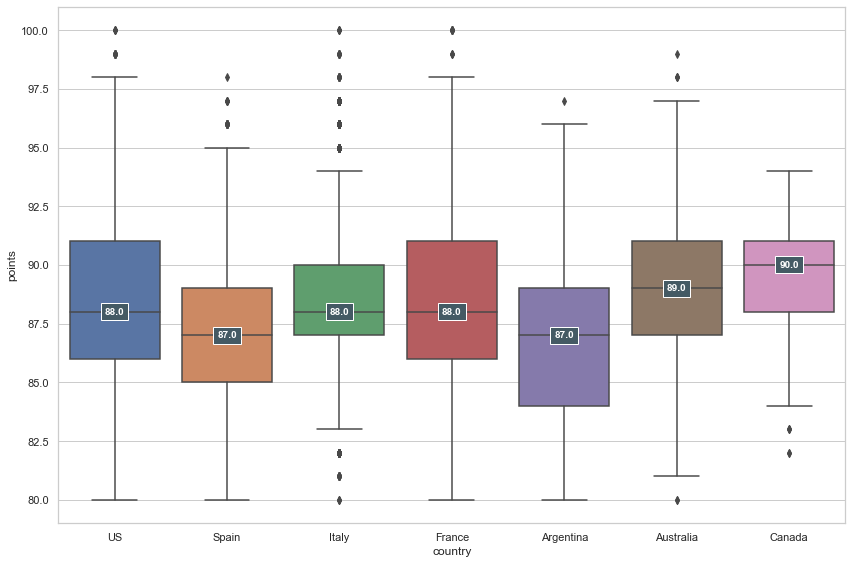

In [123]:
#see boxplots of wine points from different countries
sns.set_style("whitegrid") 
plt.figure(figsize=(12,8))

box_plot=sns.boxplot(x = 'country', y = 'points', data = df) 

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    
box_plot.figure.tight_layout()


This is quite interesting -
1. US, French and Italian wine have the same median points, and have outliers that have 100-point perfect scores
2. Italian wine has the smallest IQR while both US and French wine have the biggest
3. Australian & Canadian wine do not have large amount of data but have better median points than other major countries

In [124]:
#see boxplots of wine points from different varieties, but there are many varieties in the data
#we will add a category of other for all value counts<500
df1=df[['points','price','region_1','variety','year']].apply(lambda x: x.mask(x.map(x.value_counts())<500, 'other')
             if x.name not in ['points','price','year'] else x)
df1.head(20)

points  price           region_1             variety  year
2       87   14.0  Willamette Valley          Pinot Gris  2013
3       87   13.0              other            Riesling  2013
4       87   65.0  Willamette Valley          Pinot Noir  2012
5       87   15.0              other               other  2011
6       87   16.0              other               other  2013
7       87   24.0             Alsace      Gewürztraminer  2012
9       87   27.0             Alsace          Pinot Gris  2012
10      87   19.0        Napa Valley  Cabernet Sauvignon  2011
11      87   30.0             Alsace      Gewürztraminer  2012
12      87   34.0   Alexander Valley  Cabernet Sauvignon  2012
14      87   12.0      Central Coast          Chardonnay  2012
16      87   30.0              other              Malbec  2010
17      87   13.0            Mendoza              Malbec  2011
18      87   28.0   Ribera del Duero   Tempranillo Blend  2010
19      87   32.0           Virginia               other  2012
20      87   23.0           Virginia           Red Blend  2012
21      87   20.0              other          Pinot Noir  2013
22      87   19.0            Sicilia         White Blend  2007
23      87   22.0        Paso Robles              Merlot  2011
24      87   35.0            Sicilia               other  2009

In [130]:
#get rid of data before 1800s - either the year in the name of the wine is not accurate/not indicative of year
df1=df1[df1['year']>=1800]

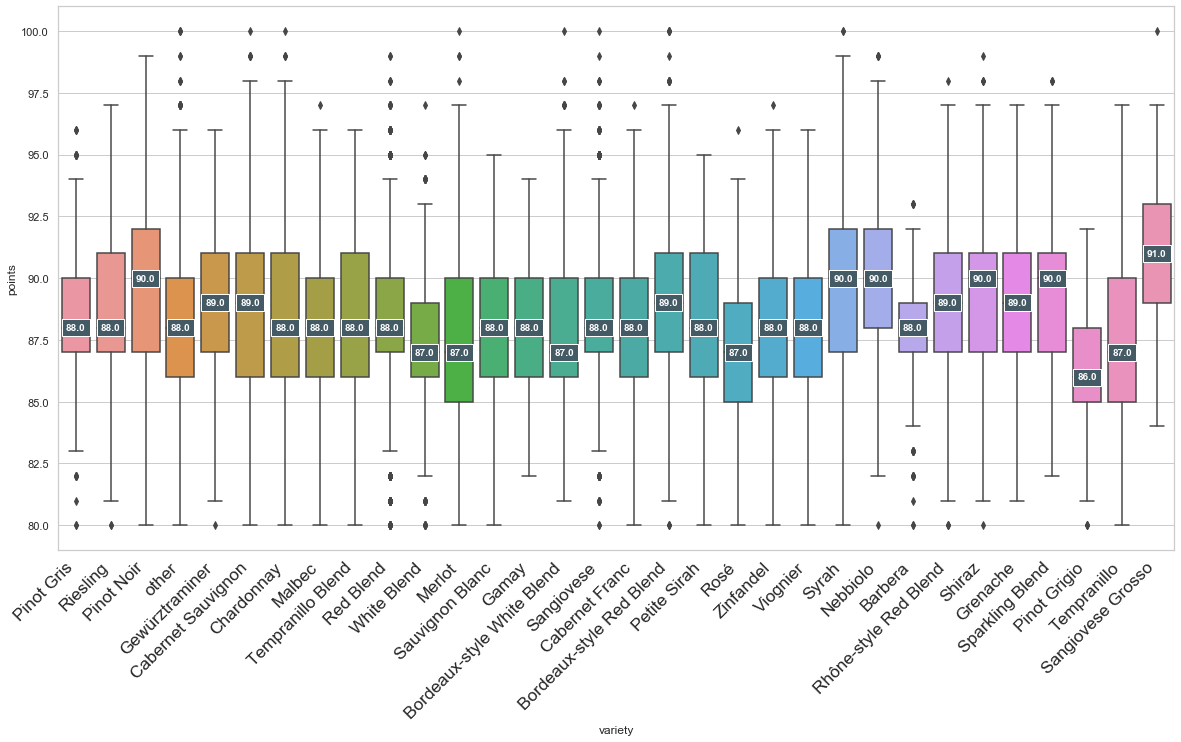

In [131]:
#create boxplots
sns.set_style("whitegrid") 
plt.figure(figsize=(20,10))

chart = sns.boxplot(x = 'variety', y = 'points', data = df1) 
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

ax = chart.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

Here we can see Pinor Noir, Syrah, Nebbiolo, Shiraz & Sangiovese Grosso have the best median points

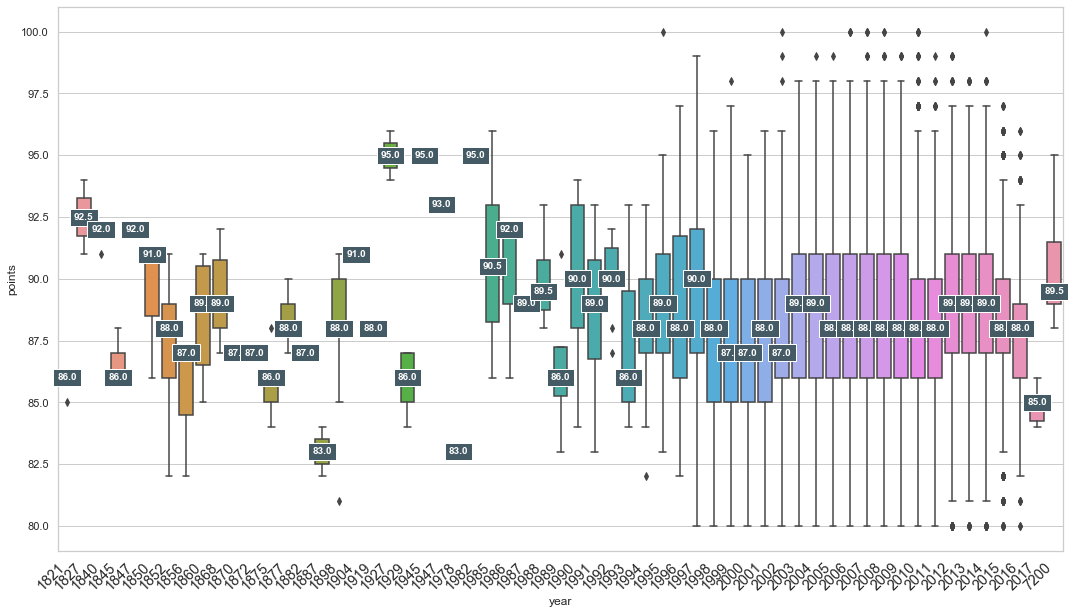

In [132]:
#create boxplots based on year
sns.set_style("whitegrid") 
plt.figure(figsize=(18,10))

chart = sns.boxplot(x = 'year', y = 'points', data = df1) 
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

ax = chart.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

Here we can see the year feature doesn't seem to have a huge impact for recent wines (1994-2017), but points of vintage wines may vary a lot.

In [133]:
#Let's try combination of year & variety
df1['variety'].value_counts().head(20)

other                       14797
Pinot Noir                  11560
Chardonnay                   9822
Cabernet Sauvignon           8262
Red Blend                    7333
Bordeaux-style Red Blend     5111
Syrah                        3613
Sauvignon Blanc              3163
Rosé                         2803
Zinfandel                    2692
Merlot                       2615
Riesling                     2580
Malbec                       2407
Sangiovese                   2368
Nebbiolo                     2323
Tempranillo                  1769
White Blend                  1746
Rhône-style Red Blend        1366
Pinot Gris                   1279
Cabernet Franc               1240
Name: variety, dtype: int64

In [134]:
#create dataframe keeping 20 top varieties and 20 top years
df2 = df1[df1['variety'].map(df['variety'].value_counts()) >=1240]
df2['year'].value_counts().head(20)

2012    10044
2013     9779
2014     9663
2010     7400
2011     7268
2009     5981
2015     5029
2008     4199
2007     3897
2006     3260
2005     2295
2016     1739
2004     1024
2000      471
1999      426
1998      413
2001      335
2003      273
1997      257
2002      155
Name: year, dtype: int64

In [113]:
df2 = df2[df2['year'].map(df['year'].value_counts()) >=155]
df2 = df2[['variety','year','points']]

#group by variety and year and calculate mean
df2_gp = df2.groupby(['variety','year'], as_index=False).median()

#pivot dataframe
df2_pivot = df2_gp.pivot(index='variety',columns='year')
df2_pivot

points                                            \
year                       1997  1998  1999  2000  2001  2002  2003  2004   
variety                                                                     
Bordeaux-style Red Blend   91.0  87.5  87.0  91.0  93.0  87.0  87.0  88.0   
Cabernet Franc             84.5  85.0  84.0  87.0  88.0   NaN  87.0  89.0   
Cabernet Sauvignon         90.0  87.0  88.0  87.5  88.5  88.0  88.0  89.0   
Chardonnay                 90.0  88.0  87.0  87.0  87.0  87.0  91.0  90.0   
Malbec                     93.0   NaN  85.0  87.0  84.0  87.0  87.0  87.5   
Merlot                     88.5  85.0  88.0  86.0  86.0  85.5  88.0  87.0   
Nebbiolo                    NaN  90.0   NaN  91.0  89.5  86.0  89.0  90.0   
Pinot Gris                  NaN  84.0  85.5  87.0  86.0  87.0   NaN  88.0   
Pinot Noir                 90.0  88.0  88.0  87.0  86.0  87.0  89.0  87.0   
Red Blend                  84.0  86.0  87.0  90.0  90.0  87.0  89.0  89.0   
Rhône-style Red Blend      86.0  88.0  93.0  86.0  87.0   NaN  89.0  88.0   
Riesling                   90.0  87.0  89.5  86.0  87.0  87.0  89.0  88.5   
Rosé                        NaN  83.0  84.0  82.0  85.5   NaN   NaN   NaN   
Sangiovese                 91.0  87.0  89.0  85.0  90.0   NaN  89.0  89.0   
Sauvignon Blanc             NaN  89.0  87.0  87.0  86.5  88.0   NaN  92.0   
Syrah                      91.5  88.5  87.0  88.0  82.0  89.5  90.0  88.0   
Tempranillo                86.0  86.5  88.0  86.0  89.0  87.0  86.5  88.0   
White Blend                97.0  83.0  88.0  86.0  90.0  88.0  92.0  91.0   
Zinfandel                  87.0  87.0  86.0  86.0  90.0  92.0  85.0  86.0   

                                                                          \
year                      2005  2006  2007  2008  2009  2010  2011  2012   
variety                                                                    
Bordeaux-style Red Blend  88.0  88.0  89.0  89.0  89.0  89.0  88.0  89.0   
Cabernet Franc            87.0  87.0  87.0  88.0  87.0  87.5  89.0  88.0   
Cabernet Sauvignon        88.0  87.0  88.0  89.0  89.0  89.0  88.0  90.0   
Chardonnay                89.0  87.0  87.0  88.0  88.0  88.0  88.0  88.0   
Malbec                    86.0  88.0  88.0  88.0  88.5  88.0  88.0  89.0   
Merlot                    87.0  86.0  87.0  87.0  87.0  87.0  88.0  88.0   
Nebbiolo                  91.0  91.0  92.0  90.0  90.0  90.0  90.0  89.0   
Pinot Gris                88.0  88.0  88.0  88.0  88.0  88.0  88.0  88.0   
Pinot Noir                89.0  88.0  89.0  89.0  89.0  89.0  89.0  90.0   
Red Blend                 88.0  88.0  88.0  88.0  88.0  88.0  88.0  89.0   
Rhône-style Red Blend     88.0  87.0  87.0  88.0  89.0  89.0  90.0  90.0   
Riesling                  85.0  88.0  87.0  87.0  87.0  88.0  88.0  88.0   
Rosé                      85.0  86.0  86.0  84.0  86.0  86.0  87.0  87.0   
Sangiovese                88.0  88.0  88.0  88.0  88.0  89.0  89.0  89.0   
Sauvignon Blanc           90.0  87.0  86.0  87.0  87.0  87.0  87.0  87.0   
Syrah                     88.0  87.0  88.0  89.0  89.0  89.0  90.0  90.0   
Tempranillo               88.0  87.0  87.0  86.0  87.0  87.0  89.0  89.0   
White Blend               88.0  87.0  87.0  88.0  87.0  87.0  87.0  87.0   
Zinfandel                 87.0  87.0  87.0  87.0  87.0  87.0  88.0  89.0   

                                                  
year                      2013  2014  2015  2016  
variety                                           
Bordeaux-style Red Blend  89.0  89.0  88.0  87.0  
Cabernet Franc            89.0  89.0  89.0  89.0  
Cabernet Sauvignon        90.0  89.0  87.0  86.0  
Chardonnay                89.0  89.0  89.0  87.0  
Malbec                    89.0  88.0  87.0  87.0  
Merlot                    88.0  88.0  87.0  85.5  
Nebbiolo                  90.0  90.0  89.0   NaN  
Pinot Gris                89.0  89.0  90.0  88.0  
Pinot Noir                91.0  91.0  90.0  88.0  
Red Blend                 88.0  88.0  88.0  8

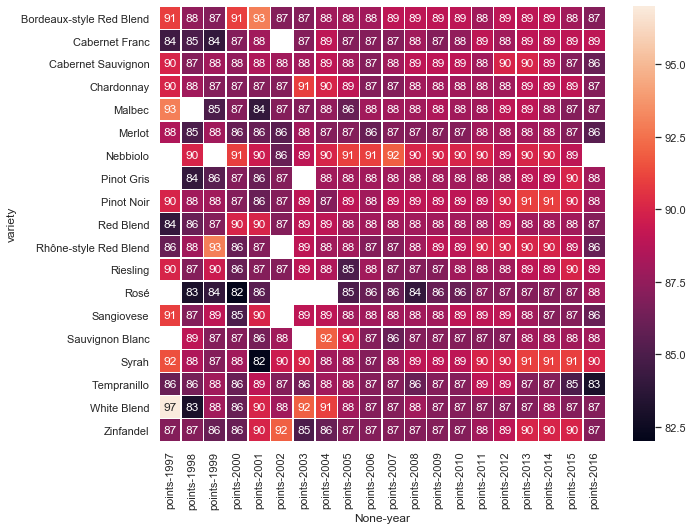

In [135]:
#create heatmap
plt.subplots(figsize=(10,8))
ax = sns.heatmap(df2_pivot, annot=True,linewidths=.5)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Seems like year combined with variety still is a bit arbitrary, but to our surprise, 1998-2005 has more wine varieties with low score vs 2006-2016.

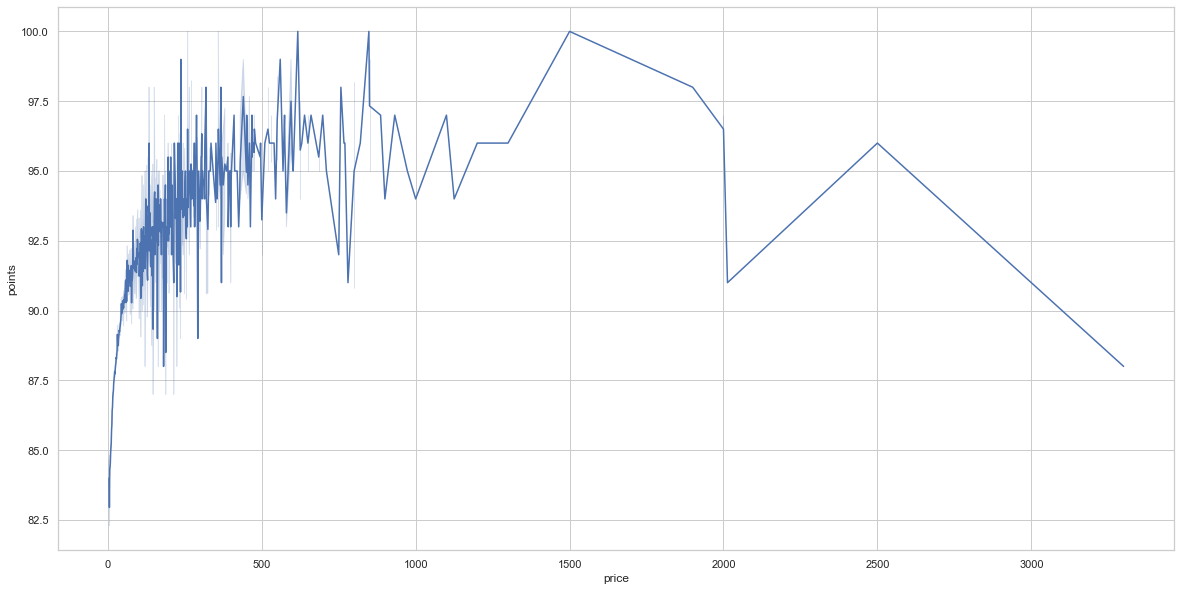

In [14]:
#let's look at price, first let's see a line plot
sns.set_style("whitegrid") 
plt.figure(figsize=(20,10))

sns.lineplot(data=df, x="price", y="points")

Again - quite interesting that outliers included we see what's close to a downward parabola; there's a general tendency of increasing of points when price increases up til around $500, then the deviation also is very drastic onwards, this might suggest that the price feature when combined with others may be a better indicator of points.

In [15]:
#let's also try to see what variety has the best median points across all regions
df_grouped = df.groupby(['country', 'region_1','variety']).agg({'points': ['median']})
df_grouped.columns = ['points_median']
df_grouped = df_grouped.reset_index()
print(df_grouped)

        country    region_1                   variety  points_median
0     Argentina      Agrelo                   Bonarda           89.0
1     Argentina      Agrelo  Bordeaux-style Red Blend           85.5
2     Argentina      Agrelo            Cabernet Franc           91.0
3     Argentina      Agrelo        Cabernet Sauvignon           87.5
4     Argentina      Agrelo                Chardonnay           84.5
...         ...         ...                       ...            ...
6981         US  Yountville                Pinot Noir           86.0
6982         US  Yountville                 Red Blend           83.0
6983         US  Yountville           Sauvignon Blanc           86.0
6984         US  Yountville           Sparkling Blend           90.0
6985         US  Yountville                     Syrah           90.0

[6986 rows x 4 columns]


In [16]:
#get maximum value of median in each group
max_median = df_grouped.groupby(['country', 'region_1']).max()
max_median = max_median.reset_index()
print(max_median)

        country                  region_1          variety  points_median
0     Argentina                    Agrelo        Red Blend           92.0
1     Argentina  Alto Valle del Río Negro  Sauvignon Blanc           90.0
2     Argentina          Altos de Mendoza           Malbec           86.0
3     Argentina                 Argentina        Torrontés           92.0
4     Argentina              Buenos Aires  Sauvignon Blanc           89.0
...         ...                       ...              ...            ...
1190         US            Yamhill County       Pinot Noir           92.0
1191         US               Yolo County        Zinfandel           90.0
1192         US             York Mountain            Syrah           94.0
1193         US       Yorkville Highlands      White Blend           93.0
1194         US                Yountville            Syrah           93.0

[1195 rows x 4 columns]


In [21]:
#create column for region+country
max_median["location"] = max_median["region_1"] + ", "+max_median["country"]
max_median.head()

country                  region_1          variety  points_median  \
0  Argentina                    Agrelo        Red Blend           92.0   
1  Argentina  Alto Valle del Río Negro  Sauvignon Blanc           90.0   
2  Argentina          Altos de Mendoza           Malbec           86.0   
3  Argentina                 Argentina        Torrontés           92.0   
4  Argentina              Buenos Aires  Sauvignon Blanc           89.0   

                              location  
0                    Agrelo, Argentina  
1  Alto Valle del Río Negro, Argentina  
2          Altos de Mendoza, Argentina  
3                 Argentina, Argentina  
4              Buenos Aires, Argentina

In [18]:
#let's visualize this on the map, but first we need to transform region info to coordinates
#pip install geopy
from geopy.geocoders import Nominatim
address='Agrelo, Argentina'
geolocator = Nominatim(user_agent="test")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

Agrelo, Distrito Agrelo, Departamento Luján de Cuyo, Mendoza, Argentina
(-33.1184629, -68.8859261)


In [24]:
#create function to create
from geopy.extra.rate_limiter import RateLimiter

#use 1s delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
#create location column
max_median['address'] = max_median['location'].apply(geocode)
#create longitude & latitude from address column (returns tuple)
max_median['point'] = max_median['address'].apply(lambda loc: tuple(loc.point) if loc else None)
#split point column into latitude, longitude and altitude columns
max_median[['latitude', 'longitude', 'altitude']] = pd.DataFrame(max_median['point'].tolist(), index=max_median.index)
max_median.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Sta. Rita Hills, US',), **{}).
Traceback (most recent call last):
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    re

RateLimiter swallowed an error after 2 retries. Called with (*('Sta. Rita Hills, US',), **{}).
Traceback (most recent call last):
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 1336, in getresponse
    response.begin()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/baberwendy/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    retur

country                  region_1          variety  points_median  \
0  Argentina                    Agrelo        Red Blend           92.0   
1  Argentina  Alto Valle del Río Negro  Sauvignon Blanc           90.0   
2  Argentina          Altos de Mendoza           Malbec           86.0   
3  Argentina                 Argentina        Torrontés           92.0   
4  Argentina              Buenos Aires  Sauvignon Blanc           89.0   

                              location  \
0                    Agrelo, Argentina   
1  Alto Valle del Río Negro, Argentina   
2          Altos de Mendoza, Argentina   
3                 Argentina, Argentina   
4              Buenos Aires, Argentina   

                                             address  \
0  (Agrelo, Distrito Agrelo, Departamento Luján d...   
1                                               None   
2  (Altos de Mendoza, Antártida Argentina, Distri...   
3            (Argentina, (-34.9964963, -64.9672817))   
4  (Ciudad Autónoma de Buenos Aires, Argentina, (...   

                             point   latitude  longitude  altitude  
0  (-33.1184629, -68.8859261, 0.0) -33.118463 -68.885926       0.0  
1                             None        NaN        NaN       NaN  
2  (-32.9451452, -60.7279173, 0.0) -32.945145 -60.727917       0.0  
3  (-34.9964963, -64.9672817, 0.0) -34.996496 -64.967282       0.0  
4  (-34.6075682, -58.4370894, 0.0) -34.607568 -58.437089       0.0

In [25]:
#since this took a while to run, let's write it to csv, so if future re-run there's no need to redo the look up
#max_median.to_csv('wine_region_best_variety.csv')

In [26]:
#check N/As
max_median.isnull().sum()

country            0
region_1           0
variety            0
points_median      0
location           0
address          373
point            373
latitude         373
longitude        373
altitude         373
dtype: int64

In [32]:
#drop N/As
max_median1= max_median.dropna()
max_median1 = max_median1.drop(['location','address','point','altitude'], axis=1)
max_median1["marker"] = max_median["region_1"] + ": "+max_median["variety"]
max_median1.head()

country          region_1          variety  points_median   latitude  \
0  Argentina            Agrelo        Red Blend           92.0 -33.118463   
2  Argentina  Altos de Mendoza           Malbec           86.0 -32.945145   
3  Argentina         Argentina        Torrontés           92.0 -34.996496   
4  Argentina      Buenos Aires  Sauvignon Blanc           89.0 -34.607568   
5  Argentina          Cafayate        Torrontés           90.5 -26.071047   

   longitude                         marker  
0 -68.885926              Agrelo: Red Blend  
2 -60.727917       Altos de Mendoza: Malbec  
3 -64.967282           Argentina: Torrontés  
4 -58.437089  Buenos Aires: Sauvignon Blanc  
5 -65.980065            Cafayate: Torrontés

In [40]:
#let's create a map with marker of region & best variety
import folium

#create a map that starts at Napa, California
m = folium.Map(location=[38.297539,-122.286865], tiles="Stamen Terrain", zoom_start=10)

tooltip = 'What\'s the best wine variety from here?'

#add marker
for i in range(0,len(max_median1)):
    folium.Marker([max_median1.iloc[i]['latitude'], max_median1.iloc[i]['longitude']], popup=max_median1.iloc[i]['marker'],tooltip=tooltip).add_to(m)

# Save it as html
m.save('wine_variety_on_map.html')
m

Pretty cool! Whenever we need to pick a wine we at least know what is the best variety from a certain region!

## Methodology
In this project we aim to what makes the highest rated wine and build a model to predict the point of a bottle based on its region, variety, price and year.

Based on the data exploration above, some of the feature interactions, and region & variety are categorical values as presented in the dataset instead of numerical; we could try using coordinates for region - this from a subject matter understanding perspective might also make sense because regions/grapes/harvest may be related to where the region is located coordinate-wise; and I will use one-hot encoding for variety. Also standardization of data will also be performed. In terms of algorithms, I will use regression and neural networks below.

In [137]:
#let's use the dataframe created above w/ just the columns we want to focus on for prediction
df1.head()

points  price           region_1     variety  year
2      87   14.0  Willamette Valley  Pinot Gris  2013
3      87   13.0              other    Riesling  2013
4      87   65.0  Willamette Valley  Pinot Noir  2012
5      87   15.0              other       other  2011
6      87   16.0              other       other  2013

In [138]:
#check data types
df1.dtypes

points        int64
price       float64
region_1     object
variety      object
year          int64
dtype: object

In [141]:
#check dataset shape
df1.shape

(97698, 5)

In [140]:
#import libraries for preprocessing etc
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [184]:
#train test split w/ default split of .25
X = df1.drop(columns='points')
y = df1['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [185]:
#let's build a single linear regression first with price
X_train0 = np.asanyarray(X_train[['price']])
X_test0 = np.asanyarray(X_test[['price']])

In [201]:
#transformer for standard scaler
ss = StandardScaler()

X_train0_scaled = ss.fit_transform(X_train0)

As we plotted above, a linear relationship probably does not exist between price and points, so we will use polynomial regression right away.

In [248]:
#use polynomial regression with degree of 3
poly = PolynomialFeatures(degree = 3) 
X0_poly = poly.fit_transform(X_train0_scaled) 
  
poly.fit(X0_poly, y_train) 
lm0 = LinearRegression() 
lm0.fit(X0_poly, y_train)
yhat=lm0.predict(X0_poly)

In [249]:
#training score
lm0.score(X0_poly, y_train)

0.28093234556235236

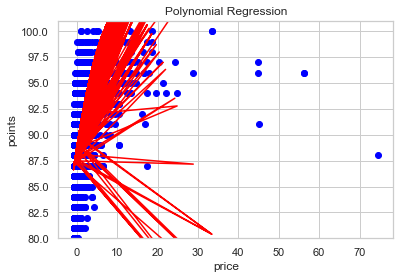

In [260]:
# Visualising the Polynomial Regression results 
plt.scatter(X_train0_scaled, y_train, color = 'blue') 
  
plt.plot(X_train0_scaled, yhat, color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('price') 
plt.ylabel('points') 

plt.ylim(80, 101) 

plt.show() 

In [251]:
#test score
X_test0_scaled = ss.fit_transform(X_test0)

poly = PolynomialFeatures(degree = 3) 
X0_poly_t = poly.fit_transform(X_test0_scaled) 
  
lm0.score(X0_poly_t, y_test)

0.28912337597418725

As we can see here, the R^2 score for both training & testing is around .28 which means approximately 28% of the variation of points is explained by this model. Not a very high score as expected. Let's move to use multiple regression. Since there are multiple columns that needs transformation, I will use a pipeline object.

In [267]:
#define transformer for one hot encoding
ohe = OneHotEncoder()

#define column groups with same processing
cat_vars = ['region_1', 'variety']
num_vars = ['price', 'year']

#set up columnTransformer
ct = ColumnTransformer(
                    transformers=[
                        ('nums', ss, num_vars),
                        ('cats', ohe, cat_vars)
                    ],
                    remainder='drop',
                    n_jobs=-1
                    )

In [268]:
#set up polynomial regression with degree of 3 and pipeline object - multiple linear regression
pipe = Pipeline([
    ('preprocessing', ct),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('mode',LinearRegression())
       ])

In [269]:
#use pipe to fit and get R^2 score
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.42461444112298274

In [273]:
#test score
pipe.score(X_test, y_test)

0.34219606958115767

From the R^2 value, we can say that approximately 42.46% of the variation of points is explained by this model. However the test score is even lower with 34.22%. Still not a very decent score. Let's try using Multi-layer Perceptron regressor.

In [261]:
#import MLPRegressor and set up pipeline
from sklearn.neural_network import MLPRegressor

pipe1 = Pipeline([
    ('preprocessing', ct),
    ('model',MLPRegressor(random_state=666, max_iter=500))
       ])

In [262]:
#use pipe to fit and get R^2 score
pipe1.fit(X_train, y_train)
pipe1.score(X_train, y_train)

0.4383637320033615

In [263]:
#test score
pipe1.score(X_test, y_test)

0.41680961457761556

Great! Our R^2 score is still a bit just ok but is more consistent between training & test set.

## Analysis
In this project I aimed to find what is driving factor(s) of wine scores and built a model to predict wine score based on price, year, region and variety.<br>
First I made some data cleansing caused by some limitations of the data set:<br>
- Missing values in some column
    - take out the rows with missing values because it does not make sense to fill with say, most frequent value for categorical value in the data set;
- The data set itself does not have year value
    - I extracted it from the title of the wine and got rid of the rare/inaccurate values;
- Most of the data come from US, French, and Italian wines
    - I focused on more granular level feature region_1 to perform the analysis<br>

Then comparing few assumptions I made to my exploratory analysis: <br>
- higher priced bottles get higher points
    - there's a general tendency of increasing of points when price increases up til around $500, but data has a lot of deviations;
- older bottles get higher points
    - The year feature doesn't have a huge impact for recent wines (1994-2017) by itself, but points of vintage wines may vary a lot;
- French and Italian wines have highest points
    - US, French and Italian wine have the same median points, and have outliers that have 100-point perfect scores
Italian wine has the smallest IQR (more consistent) while both US and French wine have the biggest
    - Australian & Canadian wine do not have large amount of data but have better median points than other major countries</br>
    
Other observation/exercise: <br>
- Pinor Noir, Syrah, Nebbiolo, Shiraz & Sangiovese Grosso have the best median points
- 1998-2005 has more wine varieties with lower scores vs 2006-2016
- built a interactive map to show best wine variety out of a region
    
To predict wine points, since the dataset is mostly categorical features, I first processed the data to get rid of rare values within these columns (done in data cleaning step), and then used standard scaler for numerial variables (price and year), and used one hot encoding for categorical variables (variety and region_1).<br>
- I first set up a single polynomial regression model to predict points solely on price
    - result is consistent with visiualization done prior, the R^2 score is relatively low of .28
- Set up multiple polynomial regression model to predict points on variety, price & region
    - result is decent for training data of .42 but has a lower score for testing data of .34
- Set up multi-layer perceptron regressor to predict points on variety, price & region
    - result is decent for training data of .44 but has a lower score for testing data of .42

## Conclusion
This project is an attempt to uncover how wines are getting scored based on its price, region and year. I learned that price nor year by itself is not necessarily a definite indicator of good wine. There are certainly a lot more to what makes a good wine than just these features. And wine score does not necessarily dictate wine being good/bad either. It may also depend on when you open a particular bottle and how you taste it. Overall, there are many subjectivity in how good a wine bottle is, but this model can be used as a starting point for beginners to wine to learn about wine is historically scored based on region, price, year.